# Modeling and Evaluation

In [1]:
### ALL THE IMPORTS NEEDED FOR THIS PHASE

# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Cross-validation
from sklearn.model_selection import GridSearchCV

# Understanding of the results of an evaluation
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Exporting/importing models
from joblib import load

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None)
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv", header=None)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120889, 37), (30223, 37), (120889, 1), (30223, 1))

In [4]:
X_train.head()

,purchase_value,age,seconds_between_purchase_signup,purchase_hour,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,...,country_Taiwan; Republic of China (ROC),country_United Kingdom,country_United States,country_Unknown,purchase_day_of_week_Monday,purchase_day_of_week_Saturday,purchase_day_of_week_Sunday,purchase_day_of_week_Thursday,purchase_day_of_week_Tuesday,purchase_day_of_week_Wednesday
0,0.712890,-0.017282,-1.138580,-0.653497,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.549086,0.678751,1.302103,-1.087733,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.198160,0.910763,-1.330176,-0.653497,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.549086,-0.133288,0.171997,0.504464,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.361965,1.258780,-0.339607,-0.364007,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


## Searching for the best hyperparameters

We will optimise the most relevant of the models applied in the first two parts.

### Logistic Regression

In [5]:
log_reg_estimator = LogisticRegression(max_iter=200)
params = {
    'C' : np.logspace(0, -4, num=5),
    'class_weight' : ['balanced', {0 : 0.047, 1 : 0.953}]
}

log_reg_grid = GridSearchCV(estimator=log_reg_estimator, param_grid=params, cv=4, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
log_reg_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 200,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=200),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'C': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
  'class_weight': ['balanced', {0: 0.047, 1: 0.953}]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [6]:
log_reg_grid.best_params_

{'C': 1.0, 'class_weight': 'balanced'}

The optimal logistic regression model is the one we studied earlier (cf part 1), namely balanced logistic regression.

### Random Forest

In [7]:
rand_forest_estimator = RandomForestClassifier()
params = {
    "n_estimators": [10, 25, 40, 55, 70, 90, 100, 120],
    "max_depth" : np.arange(4, 14, 2)
}

rand_forest_grid = GridSearchCV(
    estimator = rand_forest_estimator, 
    param_grid = params, 
    n_jobs=-1,
    cv=4
)

rand_forest_grid.fit(X_train, y_train)
rand_forest_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'n_estimators': [10, 25, 40, 55, 70, 90, 100, 120],
  'max_depth': array([ 4,  6,  8, 10, 12])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [8]:
rand_forest_grid.best_params_

{'max_depth': 6, 'n_estimators': 55}

The optimal random forest model is apparently one with 55 trees and a maximum depth of 6.

In [9]:
print("Optimal Random Forest score on the training set", rand_forest_grid.best_estimator_.score(X_train, y_train))
print("Optimal Random Forest score on the test set", rand_forest_grid.best_estimator_.score(X_test, y_test))

Optimal Random Forest score on the training set 0.9567123559629082
Optimal Random Forest score on the test set 0.956390828177216


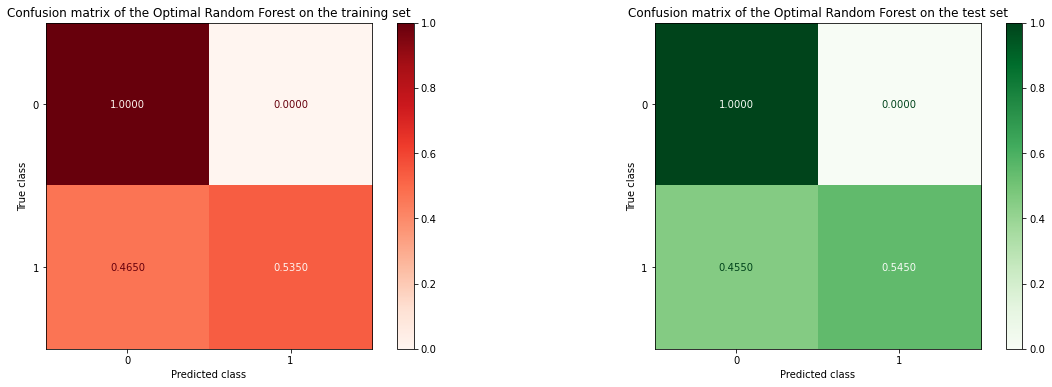

In [10]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(rand_forest_grid, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the Optimal Random Forest on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(rand_forest_grid, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the Optimal Random Forest on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

In [11]:
print("Optimal Random forest : classification metrics on the training set")
print(classification_report(y_true=y_train, y_pred=rand_forest_grid.predict(X_train)))
print()
print("Optimal Random forest : classification metrics on the test set")
print(classification_report(y_true=y_test, y_pred=rand_forest_grid.predict(X_test)))

Optimal Random forest : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    109635
           1       1.00      0.54      0.70     11254

    accuracy                           0.96    120889
   macro avg       0.98      0.77      0.84    120889
weighted avg       0.96      0.96      0.95    120889


Optimal Random forest : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27326
           1       1.00      0.55      0.71      2897

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



We obtain exactly the same results as in the first random forest model.

## Comparison between the models

* We will compare the results from four models : 
    - the balanced logistic regression model (or the optimal logistic regression model)
    - the random forest model (or the optimal random forest model)
    - the AdaBoost model built on 100 decision trees with a maximum depth of 5
    - the XGBoost model built on 100 decision trees with a maximum depth of 6

In [12]:
# Balanced Logistic Regression
log_reg_balanced_roc_auc = roc_auc_score(y_test, log_reg_grid.best_estimator_.predict(X_test))
fpr_log_reg_balanced, tpr_log_reg_balanced, _ = roc_curve(y_test, log_reg_grid.best_estimator_.predict_proba(X_test)[:,1])

# Random Forest
rand_forest_roc_auc = roc_auc_score(y_test, rand_forest_grid.best_estimator_.predict(X_test))
fpr_rand_forest, tpr_rand_forest, _ = roc_curve(y_test, rand_forest_grid.best_estimator_.predict_proba(X_test)[:,1])

# AdaBoost
ada_boost_depth_5 = load("ada_boost_depth_5.joblib")
ada_boost_roc_auc = roc_auc_score(y_test, ada_boost_depth_5.predict(X_test))
fpr_ada_boost, tpr_ada_boost, _ = roc_curve(y_test, ada_boost_depth_5.predict_proba(X_test)[:,1])

# XGBoost
xg_boost = load("xg_boost.joblib")
xg_boost_roc_auc = roc_auc_score(y_test, xg_boost.predict(X_test))
fpr_xg_boost, tpr_xg_boost, _ = roc_curve(y_test, xg_boost.predict_proba(X_test)[:,1])

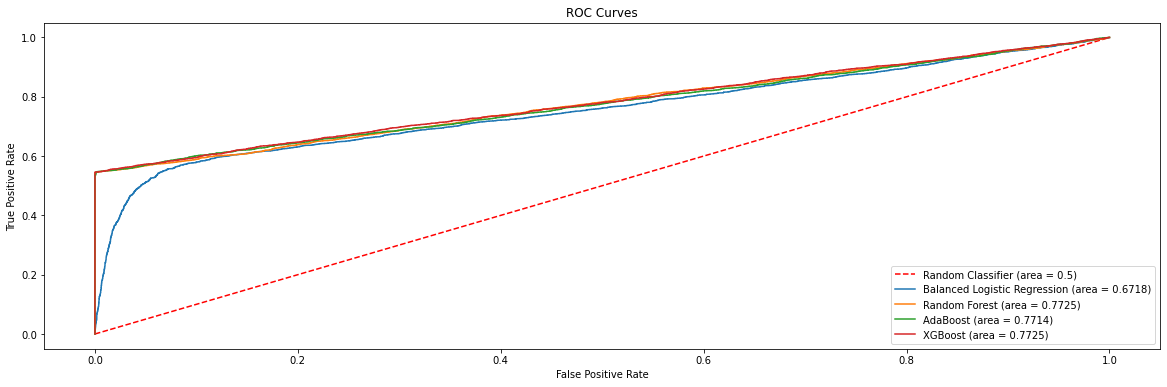

In [13]:
plt.figure(figsize=(20,6))

plt.title('ROC Curves')
plt.plot([0, 1], [0, 1],'r--', label="Random Classifier (area = 0.5)")
plt.plot(fpr_log_reg_balanced, tpr_log_reg_balanced, label='Balanced Logistic Regression (area = %0.4f)' % log_reg_balanced_roc_auc)
plt.plot(fpr_rand_forest, tpr_rand_forest, label='Random Forest (area = %0.4f)' % rand_forest_roc_auc)
plt.plot(fpr_ada_boost, tpr_ada_boost, label='AdaBoost (area = %0.4f)' % ada_boost_roc_auc)
plt.plot(fpr_xg_boost, tpr_xg_boost, label='XGBoost (area = %0.4f)' % xg_boost_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [14]:
model_comparison = pd.DataFrame(index=[
    "Balanced Logistic Regression",
    "Random Forest",
    "AdaBoost", 
    "XGBoost",
])
model_comparison["Accuracy"] = [
    log_reg_grid.score(X_test, y_test),
    rand_forest_grid.score(X_test, y_test), 
    ada_boost_depth_5.score(X_test, y_test),
    xg_boost.score(X_test, y_test), 
]
model_comparison["Balanced Accuracy"] = [
    balanced_accuracy_score(y_test, log_reg_grid.predict(X_test)),
    balanced_accuracy_score(y_test, rand_forest_grid.predict(X_test)),
    balanced_accuracy_score(y_test, ada_boost_depth_5.predict(X_test)),
    balanced_accuracy_score(y_test, xg_boost.predict(X_test)),
]
model_comparison["F1 Score"] = [
    f1_score(y_test, log_reg_grid.predict(X_test)),
    f1_score(y_test, rand_forest_grid.predict(X_test)),
    f1_score(y_test, ada_boost_depth_5.predict(X_test)),
    f1_score(y_test, xg_boost.predict(X_test)),
]
model_comparison["Precision"] = [
    precision_score(y_test, log_reg_grid.predict(X_test)),
    precision_score(y_test, rand_forest_grid.predict(X_test)),
    precision_score(y_test, ada_boost_depth_5.predict(X_test)),
    precision_score(y_test, xg_boost.predict(X_test)),
]
model_comparison["Recall"] = [
    recall_score(y_test, log_reg_grid.predict(X_test)),
    recall_score(y_test, rand_forest_grid.predict(X_test)),
    recall_score(y_test, ada_boost_depth_5.predict(X_test)),
    recall_score(y_test, xg_boost.predict(X_test)),
]

In [15]:
precision, recall, thresholds_pre_rec = precision_recall_curve(y_test, xg_boost.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds_fpr_tpr = roc_curve(y_test, xg_boost.predict_proba(X_test)[:, 1])
precision_recall_df = pd.DataFrame({"Precision" : precision, "Recall" : recall, "Thresholds_pre_rec" : np.concatenate([np.array([0]), thresholds_pre_rec])})
fpr_tpr_df = pd.DataFrame({"FPR" : fpr, "TPR" : tpr, "Thresholds_fpr_tpr" : thresholds_fpr_tpr})

In [16]:
precision_recall_df

,Precision,Recall,Thresholds_pre_rec
0,0.095949,1.000000,0.000000
1,0.095919,0.999655,0.003674
2,0.095923,0.999655,0.003676
3,0.095893,0.999310,0.003696
4,0.095896,0.999310,0.003785
...,...,...,...
29115,1.000000,0.002761,0.999979
29116,1.000000,0.002416,0.999980
29117,1.000000,0.001726,0.999980
29118,1.000000,0.000345,0.999981


In [17]:
fpr_tpr_df

,FPR,TPR,Thresholds_fpr_tpr
0,0.000000,0.000000,1.999988
1,0.000000,0.000345,0.999988
2,0.000000,0.001726,0.999981
3,0.000000,0.002416,0.999980
4,0.000000,0.002761,0.999980
...,...,...,...
3095,0.998866,0.999310,0.003785
3096,0.998866,0.999655,0.003696
3097,0.998902,0.999655,0.003676
3098,0.998902,1.000000,0.003674


In [18]:
model_comparison

,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
Balanced Logistic Regression,0.647950,0.671849,0.276387,0.172101,0.701415
Random Forest,0.956391,0.772523,0.705541,1.000000,0.545047
AdaBoost,0.951858,0.771405,0.685813,0.915802,0.548153
XGBoost,0.956391,0.772523,0.705541,1.000000,0.545047


## Conclusion

* We have tried to build a model that minimises the type II error, i.e. the false negative rate, which is the number of fraudulent transactions that the model declares legal.
* In view of the comparison table and the ROC curves, despite low precision, the best model is the balanced logistic regression model since the recall value is 0.70, which means that the false negative rate is 0.30. The other models are more precise (precision higher than 90%), but the recall value does not exceed 55%, which means that of all the fraudulent transactions in our test set, these models only manage to recognise half of them.
* In the first part of the Modeling and Evaluation phase, we found by analysing the balanced logistic regression results that the most influential feature is elapsed time between registration and purchase. Even if the coefficient attached to this variable is not high (0.8 in absolute value), it would be very wise to check the transactions made by users a few seconds after their registration. As a reminder, more than half of the illegal transactions in the data sample were performed within one second of account creation.   
* To go further and to be able to build models with high rates of correct predictions, more data is needed. This data must :
    - spread over a longer period ; in our study, the data concerned the transactions carried out in 2015 only
    - contain more features ; the information collected on the users carrying out the transactions (gender, age, internet browser, ip address,...) is not sufficient to establish user profiles likely to commit fraud.